In [1]:
import pandas as pd
import numpy as np

In [2]:
def get_sd_model(sd_log,original_sd_model):
    equ_set = get_equations(sd_log) # get equations(sth like y = 5a+6b+c) from sd_log, return a list of dictionary includes coeffcient and variables for every feature
    #[{'Finish rate':[(1.23,'Arrival rate'),(-0.987,'Service time per case'),(63.5,)]}]
    improved_sd_model = modify_sd_model(original_sd_model,equ_set)
    return improved_sd_model

In [3]:
def modify_sd_model(original_sd_model,equ_set):
    
    # read original sd model
    ori_sd_model = read_sd_model(original_sd_model)
    # change the content of given sd model
    improved_sd_model = improve_sd_model(ori_sd_model,equ_set)
    return improved_sd_model

In [10]:
# test pysd with a teacup model

In [2]:
import pysd

In [3]:
from matplotlib import pyplot as plt

In [4]:
# read model
model = pysd.read_vensim('/Users/robin/GitLab/thesis/Teacup/Teacup.mdl')

In [6]:
model.doc()

Real Name              Py Name               Unit          Lims  \
0  Characteristic Time  characteristic_time         b'Minutes'  (None, None)   
1           FINAL TIME           final_time          b'Minute'  (None, None)   
2    Heat Loss to Room    heat_loss_to_room  b'Degrees/Minute'  (None, None)   
3         INITIAL TIME         initial_time          b'Minute'  (None, None)   
4     Room Temperature     room_temperature                b''  (None, None)   
5              SAVEPER              saveper          b'Minute'   (0.0, None)   
6            TIME STEP            time_step          b'Minute'   (0.0, None)   
7   Teacup Temperature   teacup_temperature         b'Degrees'  (None, None)   

        Type                                                Eqn  \
0   constant                                              b'10'   
1   constant                                              b'30'   
2  component  b'(Teacup Temperature - Room Temperature) / Ch...   
3   constant                                               b'0'   
4   constant                                              b'70'   
5  component                                       b'TIME STEP'   
6   constant                                           b'0.125'   
7  component                b'INTEG ( -Heat Loss to Room, 180)'   

                                             Comment  
0                                                b''  
1              b'The final time for the simulation.'  
2  b'This is the rate at which heat flows from th...  
3            b'The initial time for the simulation.'  
4                                                b''  
5      b'The frequency with which output is stored.'  
6               b'The time step for the simulation.'  
7                                                b''

In [14]:
model.components.teacup_temperature()

180

In [15]:
model.components.room_temperature()

70

In [7]:
model.doc()['Eqn'][2]

"b'(Teacup Temperature - Room Temperature) / Characteristic Time'"

In [16]:
n_samples, n_features = 10, 1
rng = np.random.RandomState(0)
y = rng.randn(n_samples)
X = rng.randn(n_samples, n_features)

In [17]:
X

array([[ 0.14404357],
       [ 1.45427351],
       [ 0.76103773],
       [ 0.12167502],
       [ 0.44386323],
       [ 0.33367433],
       [ 1.49407907],
       [-0.20515826],
       [ 0.3130677 ],
       [-0.85409574]])

In [18]:
from sklearn.svm import SVR
regression = SVR()
regression.fit(X, y)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [19]:
def new_heatflow_function():
    tea_temp = model.components.teacup_temperature()
    room_temp = model.components.room_temperature()
    return regression.predict([room_temp, tea_temp])[0]

In [20]:
new_heatflow_function()

ValueError: Expected 2D array, got 1D array instead:
array=[ 70. 180.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
# try with BPTK_Py

In [4]:
from BPTK_Py import Model
from BPTK_Py import sd_functions as sd

In [5]:
# create model
# test_model = Model(starttime=1.0,stoptime=10.0,dt=1.0,name='Population')

In [6]:
# set stocks, flows and variables
# population = test_model.stock('population')
# population.initial_value = float(80000000)

# births = test_model.flow('births')
# deaths = test_model.flow('deaths')

# # define equations
# births.equation = float(1000000)
# deaths.equation = float(2000000)
# population.equation = births - deaths

In [7]:
# birthRate = test_model.converter('birthRate')
# deathRate = test_model.converter('deathRate')
# foodAvaiablePerPerson = test_model.converter('foodAvaiablePerPerson')
# foodAvaiable = test_model.constant('foodAvaiable')


# foodAvaiable.equation = 80000000.0
# foodAvaiablePerPerson.equation = foodAvaiable / population
# birthRate.equation = 0.01* foodAvaiablePerPerson
# births.equation = birthRate*population

In [8]:
# test_model.points['deathRate'] = [
#     [0.0,1.0],
#     [0.1,0.670320046036],
#     [0.2,0.449328964117],
#     [0.3,0.301194211912],
#     [0.4,0.201896517995],
#     [0.5,0.135335283237],
#     [0.6,0.0907179532894],
#     [0.7,0.0608100626252],
#     [0.8,0.0407622039784],
#     [0.9,0.0273237224473],
#     [1.0,0.0183156388887]
# ]
# deaths.equation = deathRate*population

In [11]:
import BPTK_Py

In [9]:
# bptk = BPTK_Py.bptk()
# bptk.register_model(test_model)

In [10]:
# bptk.plot_scenarios(
#     scenarios="base",
#     scenario_managers="smPopulation",
#     equations=["population","deaths","births"])

In [64]:
# population.plot()

In [12]:
sd_log = pd.read_csv('/Users/robin/GitLab/thesis/data/BPI2012/Active2012_1D_sdlog.csv')

In [13]:
sd_log.head()

Arrival rate1D  Finish rate1D  Num of unique resource1D  \
0              43             31                        39   
1              50             29                        38   
2             107            101                        40   
3              83             85                        42   
4             126            111                        41   

   Process active time1D  Service time per case1D  Time in process per case1D  \
0           10199.383333              3284.688889                  242.842460   
1           10678.516667              3110.885034                  217.928912   
2           20380.683333              2671.339706                  199.810621   
3           18983.550000              2891.513992                  234.364815   
4           29753.266667              2689.066949                  252.146328   

   Waiting time in process per case1D  Num in process case1D  
0                        -3041.846429                   12.0  
1                        -2892.956122                   33.0  
2                        -2471.529085                   39.0  
3                        -2657.149177                   37.0  
4                        -2436.920621                   52.0

In [14]:
# modify sd log slightly for further model building 
sd_log = sd_log.drop('Waiting time in process per case1D',axis =1)

In [15]:
log_features = list(sd_log.columns)
log_size = sd_log.shape

In [16]:
lookup_table_arrival_rate = [[i,sd_log['Arrival rate1D'][i-1]] for i in range(1,log_size[0]+1)]
lookup_table_unique_resource = [[i,sd_log['Num of unique resource1D'][i-1]] for i in range(1,log_size[0]+1)]

In [56]:
# try with local sd log
# create sd model first
model = Model(starttime=1.0,stoptime=log_size[0],dt=1.0, name='Demo')

# set stock and flows
numInProcessPerCase = model.stock('numInProcessPerCase')
numInProcessPerCase.initial_value = float(sd_log['Num in process case1D'][0])

arrivalRate = model.flow('arrivalRate')
finishRate = model.flow('finishRate')

# set other variables
numOfUniqueResource = model.converter('numOfUniqueResource')
timeInProcessPerCase = model.converter('timeInProcessPerCase')
serviceTimePerCase = model.converter('serviceTimePerCase')

# set equations for stock, flows and variables
numInProcessPerCase.equations = arrivalRate - finishRate
model.points['arrivalRate'] = lookup_table_arrival_rate
local_model.points['numOfUniqueResource'] = lookup_table_unique_resource


timeInProcessPerCase.equations = -1.003*arrivalRate-1.505*numOfUniqueResource+191.804+167
finishRate.equations = 0.953*arrivalRate+1.147*numOfUniqueResource-21.616-22.3
serviceTimePerCase.equations = -3.104*finishRate+12.362*timeInProcessPerCase+66.402*numInProcessPerCase-2755.11

In [49]:
# set a dummy variable using as time index
dummy = local_model.converter('dummy')

In [50]:
local_model.points['dummy'] = [[i,i] for i in range(1,log_size[0]+1)]

In [57]:
arrivalRate.equations = sd.lookup(15,'lookup_table_arrival_rate')

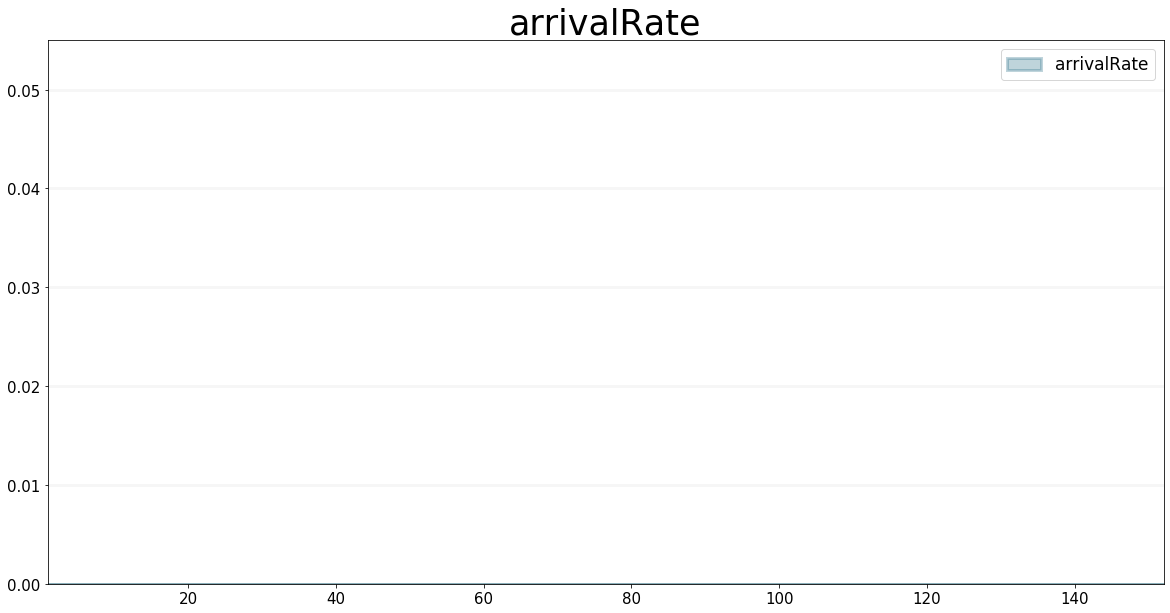

In [58]:
arrivalRate.plot()

In [26]:
# register model
bptk_local_model = BPTK_Py.bptk()
bptk_local_model.register_model(local_model)

In [36]:
# run model
bptk_local_model.plot_scenarios(
    scenarios="base",
    scenario_managers="smlocal_model",
    equations=['numInProcessPerCase'])

2020-11-27 16:43:05.271763, [ERROR] Scenario manager "smlocal_model" not found! Did you maybe mean one of "smLocal_model"?
2020-11-27 16:43:05.272468, [ERROR] Scenario "base" not found in any scenario manager!


In [ ]:
# try BPTK_Py with local model
# def generate_sd_model(sd_log):
#     # read sd log
#     log_features = list(sd_log.columns)
#     log_size = sd_log.shape
    